# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [57]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
bus-breakdown-and-delays.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bus-breakdown-and-delays.zip
replace Bus_Breakdown_and_Delays.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing Libraries

In [58]:
import pandas as pd
import seaborn as sns
import keras
from keras import layers


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [59]:
df=pd.read_csv('Bus_Breakdown_and_Delays.csv')

In [60]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [61]:
df.shape

(147972, 21)

In [62]:
df.describe().transpose()  #num of students doesnt make sense 9007?, there should be outliers

,count,mean,std,min,25%,50%,75%,max
Busbreakdown_ID,147972.0,1.287779e+06,43243.382164,1212681.0,1250437.75,1287843.5,1325191.25,1362605.0
Number_Of_Students_On_The_Bus,147972.0,3.590071e+00,55.365859,0.0,0.00,0.0,4.00,9007.0


<Axes: xlabel='Reason', ylabel='Count'>

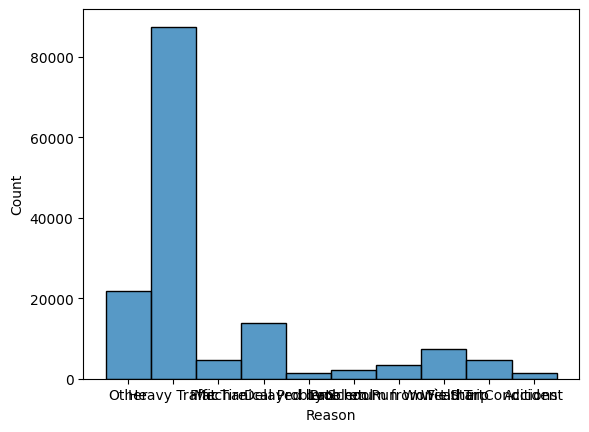

In [63]:

sns.histplot(df['Reason'])

In [64]:
df['Reason'].unique()

array(['Other', 'Heavy Traffic', 'Flat Tire', 'Mechanical Problem',
       'Delayed by School', 'Problem Run', 'Late return from Field Trip',
       'Won`t Start', 'Weather Conditions', 'Accident', nan], dtype=object)

In [65]:
df['How_Long_Delayed'].value_counts()  #diff in naming

,count
How_Long_Delayed,
20 MINS,5662
30 MINS,4542
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
25+,1
40 MINTUES,1
40 MIN,1


<Axes: xlabel='Breakdown_or_Running_Late', ylabel='Count'>

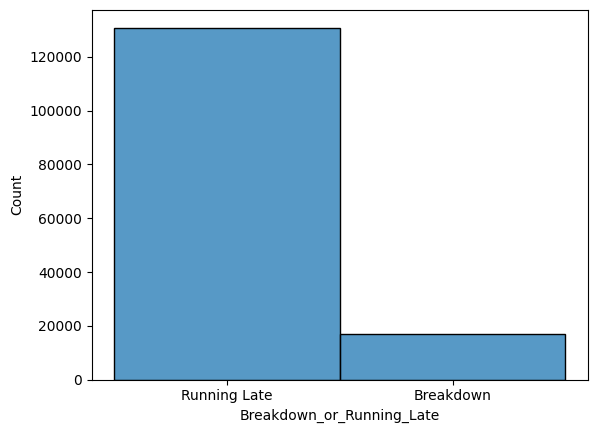

In [66]:
sns.histplot(df['Breakdown_or_Running_Late'])

<Axes: ylabel='Number_Of_Students_On_The_Bus'>

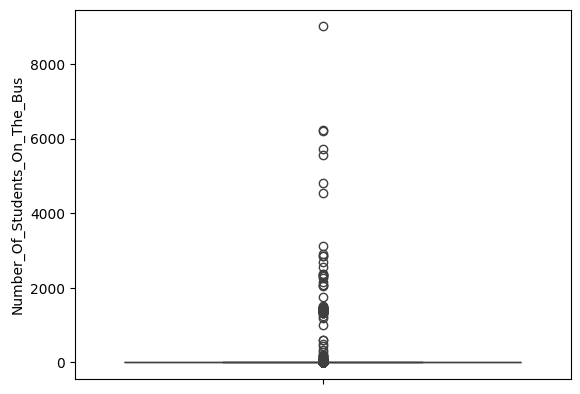

In [67]:
sns.boxplot(df['Number_Of_Students_On_The_Bus']) #looking for outliers

In [68]:
df['Number_Of_Students_On_The_Bus'].describe()  #the diff between mean an median is not huge , but its not possible to have 9007 students in one bus

,Number_Of_Students_On_The_Bus
count,147972.000000
mean,3.590071
std,55.365859
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,9007.000000


In [69]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [70]:
corr=df.corr(numeric_only=True)

<Axes: >

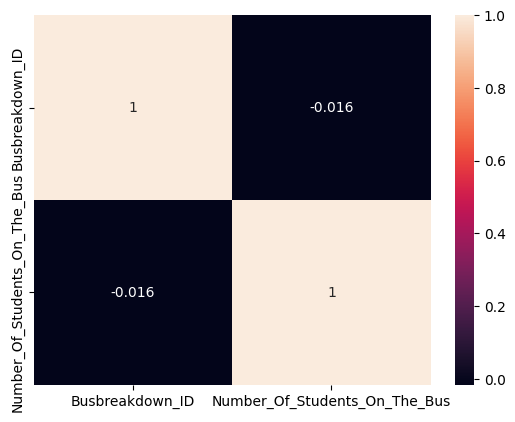

In [71]:
sns.heatmap(corr,annot=True) #nothing to tell from here

In [72]:
df.duplicated().sum()

0

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [73]:
#handling missing values

df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [74]:
#checking runtype

df['Run_Type']

,Run_Type
0,Pre-K/EI
1,Pre-K/EI
2,Pre-K/EI
3,Pre-K/EI
4,Pre-K/EI
...,...
147967,Pre-K/EI
147968,Pre-K/EI
147969,Special Ed PM Run
147970,Special Ed PM Run


In [75]:
#i will drop incident number since it has a lot of null values and seem insignificant to our model

df=df.drop(columns='Incident_Number',axis=1)

#i will impute the rest

In [76]:
# i want to standrize minuts in how long delay

df['How_Long_Delayed'].value_counts()

,count
How_Long_Delayed,
20 MINS,5662
30 MINS,4542
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
25+,1
40 MINTUES,1
40 MIN,1


In [77]:
df['How_Long_Delayed']=df['How_Long_Delayed'].replace('30 MINS','30')
df['How_Long_Delayed']=df['How_Long_Delayed'].replace('30 minutes','30')
df['How_Long_Delayed']=df['How_Long_Delayed'].replace('30MINS','30')
df['How_Long_Delayed']=df['How_Long_Delayed'].replace('40 MIN','40')
df['How_Long_Delayed']=df['How_Long_Delayed'].replace('40 MINUTES','40')
df['How_Long_Delayed']=df['How_Long_Delayed'].replace('20 MINS','20')

#This has a lot of unique values that needs deeling with but i will comeback to it if i have time, i am sure there is a better way to do this


In [92]:
cat=df.select_dtypes(include='object').columns
num=df.select_dtypes(exclude='object').columns

In [79]:
cat

Index(['School_Year', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [80]:
num

Index(['Busbreakdown_ID', 'Number_Of_Students_On_The_Bus'], dtype='object')

In [81]:
from sklearn.impute import SimpleImputer
cat=df.select_dtypes(include='object').columns
num=df.select_dtypes(exclude='object').columns
imputer=SimpleImputer(strategy='most_frequent')
df[['Run_Type']]=imputer.fit_transform(df[['Run_Type']])
df[['Route_Number']]=imputer.fit_transform(df[['Route_Number']])
df[['Reason']]=imputer.fit_transform(df[['Reason']])
df[['Boro']]=imputer.fit_transform(df[['Boro']])
df[['How_Long_Delayed']]=imputer.fit_transform(df[['How_Long_Delayed']])

In [82]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
df
df['Number_Of_Students_On_The_Bus']=scaler.fit_transform(df[['Number_Of_Students_On_The_Bus']])

In [83]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


<Axes: ylabel='Number_Of_Students_On_The_Bus'>

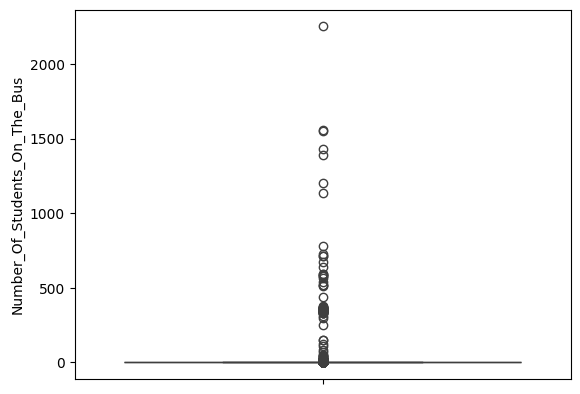

In [84]:
#Handling outliers

sns.boxplot(df['Number_Of_Students_On_The_Bus'])

In [85]:
df2=df[df['Number_Of_Students_On_The_Bus']<60]  #i put what i think might be reasnoable

In [86]:
df2['Number_Of_Students_On_The_Bus']=df2['Number_Of_Students_On_The_Bus'].astype(int)

<ipython-input-86-c64ae12e3358>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Number_Of_Students_On_The_Bus']=df2['Number_Of_Students_On_The_Bus'].astype(int)


In [87]:
df2['Number_Of_Students_On_The_Bus'].value_counts()  #it doesnt make sense that the values are inhalf

,count
Number_Of_Students_On_The_Bus,
0,107538
1,24527
2,9676
3,3540
4,1075
5,568
6,294
7,266
8,128


In [88]:
df['Number_Of_Students_On_The_Bus']=df['Number_Of_Students_On_The_Bus'].astype(int)

In [89]:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Run_Type,object
Bus_No,object
Route_Number,object
Reason,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Boro,object


In [90]:
#choose features

df=df.drop(columns=['School_Year','Busbreakdown_ID','Occurred_On','Created_On','Informed_On','Last_Updated_On'])

In [93]:
from sklearn.preprocessing import LabelEncoder

Encoder=LabelEncoder()
cat.tolist()
df[cat] = df[cat].apply(Encoder.fit_transform)

In [ ]:
df  #i could drop school serviced + how long delayed until processed



In [94]:
df3=df.drop(columns=['Schools_Serviced','How_Long_Delayed'],axis=1)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [95]:
x=df3.drop(columns='Breakdown_or_Running_Late',axis=1)
y=df3['Breakdown_or_Running_Late']

In [96]:
from sklearn.model_selection import train_test_split



In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)




## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [110]:
from keras import ops
model=keras.Sequential()
model.add(layers.Dense(units=6,input_dim=x_train.shape[1],activation='relu'))
model.add(layers.Dense(units=10,activation='relu'))
model.add(layers.Dense(units=10,activation='relu'))
model.add(layers.Dense(units=15,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [111]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Training the Model
Train the ANN model using the training data.

In [112]:
history=model.fit(x_train,y_train,batch_size=16,epochs=10)


Epoch 1/10
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8067 - loss: 4.0639
Epoch 2/10
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8806 - loss: 0.3669
Epoch 3/10
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8847 - loss: 0.3485
Epoch 4/10
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8853 - loss: 0.3456
Epoch 5/10
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8853 - loss: 0.3445
Epoch 6/10
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8848 - loss: 0.3454
Epoch 7/10
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8832 - loss: 0.3490
Epoch 8/10
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8838 - loss: 0.3471
Epoch 9/10
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8849 - loss: 0.3456
Epoch 10/10
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.8848 - loss: 0.3452


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [113]:
model.evaluate(X_test,y_test)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8859 - loss: 0.3426


[0.3415319323539734, 0.8870755434036255]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [114]:
predictions=model.predict(X_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

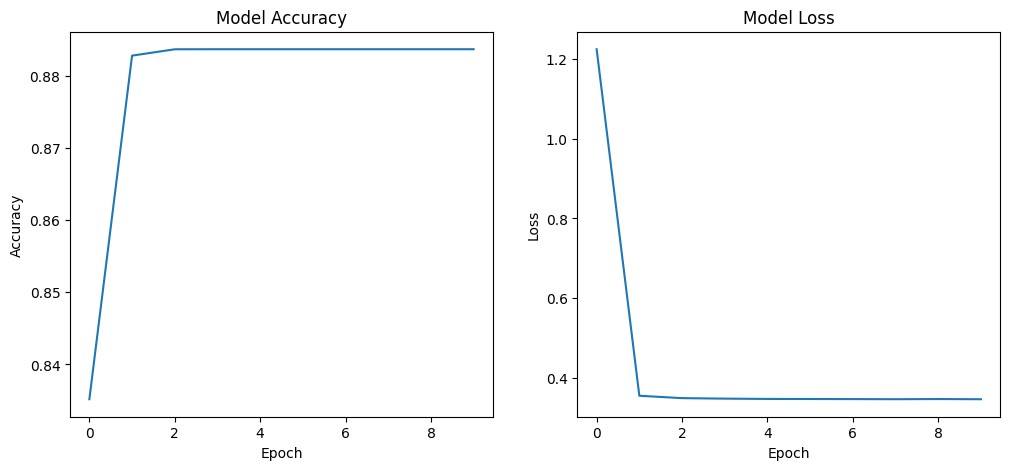

In [117]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')



plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')



plt.show()


#this shows it could be over fitting and i think its because we need to work on the preprocessing such as oversapling and handling inconsistencies

## Save the Model
Save the trained model for submission.

In [118]:
model.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1-I chose label encoder to keep the df from getting complex since we have 21 columns, although i think if we tried one hot encoder we could get better results


2-i chose 3 dense layers with the last activation function being sigmoid since its 0 or 1, with the layers i expereminted to see different results

3-for the optemizer i chose adam since its very common and tends to perform well.I chose inary cross for the loss since we are dealing with binary prediction


4-for the batch i chose 16 as its a common choice that tends to work well

5--

6-i chose accurecy and loss to evaluate

7--

8-i think the model is overfitting because the accurecy increased immediately while the loss dropped immediately.